<a href="https://colab.research.google.com/github/pierrej0/images-selection/blob/main/W6_image_classification_(contrast_motif).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import of libraries

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 27.3MB/s 
     |████████████████████████████████| 204kB 50.4MB/s 
     |████████████████████████████████| 1.2MB 29.5MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 61kB 11.1MB/s 
     |████████████████████████████████| 61kB 10.9MB/s 
Mounted at /content/gdrive


In [ ]:
pip install jmd_imagescraper

In [ ]:
from jmd_imagescraper.core import *
from pathlib import Path
from fastbook import *
from fastai.vision.widgets import *
from jmd_imagescraper.imagecleaner import *
from fastai.vision.all import *


matplotlib.rc('image', cmap='Greys')

I use my images from my google drive so I mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I give the path to access the image folders

In [ ]:
#path = Path("/content/images1/")
path = Path("/content/drive/MyDrive/image selection")

Turn our images in dataloaders

In [ ]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

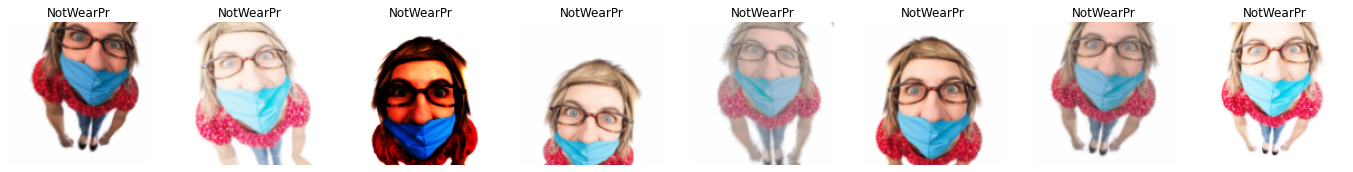

In [ ]:
tsfm = aug_transforms(                      
                      #flip_vert=True,
                      #p_lighting=1, # We apply a change in brightness and contrast of max_lighting.
                      max_lighting=0.7,
                      #mult=1, # max_rotate,max_lighting,max_warp are multiplied by mult 
                      # so you can more easily increase or decrease augmentation with a single parameter.
                     )
images = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files, 
                   #get_items=partial(get_files, extensions=['.jpg','.jpeg']),
                   get_y=parent_label,
                   splitter=RandomSplitter(seed=42),
                   item_tfms=Resize(128),
                   batch_tfms=[*tsfm,
                               Normalize.from_stats(*imagenet_stats)])
dls = images.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1, unique=True)

In [ ]:
dls = images.dataloaders(path)

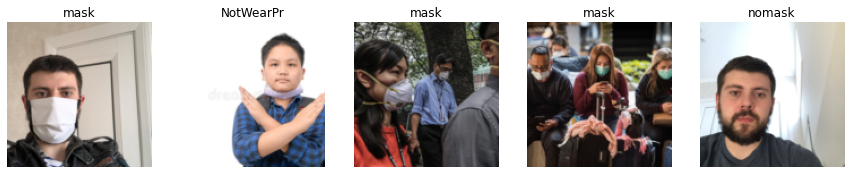

In [ ]:
dls.valid.show_batch(max_n=(5), nrows=1)

I create my learner 

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.722866,2.805088,0.672000,01:34


epoch,train_loss,valid_loss,error_rate,time
0,1.088957,0.858300,0.232000,00:06
1,0.940107,0.358887,0.152000,00:06
2,0.782924,0.365580,0.144000,00:06
3,0.690774,0.334641,0.128000,00:06


Check with the confusion matrix where are the mistakes 

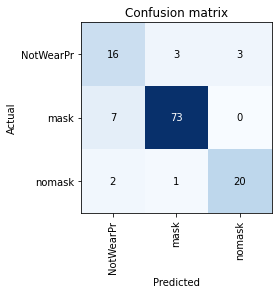

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

let's see which pictures are wrong

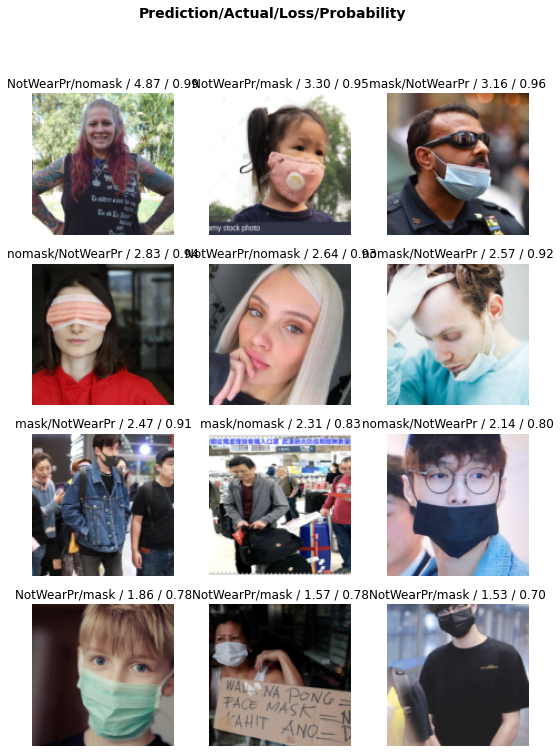

In [ ]:
interp.plot_top_losses(12, nrows=4)

In [ ]:
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

I have done some trial to images modifications

In [ ]:
# Importing necessary libraries
import keras
import tensorflow
from skimage import io
import os
import glob
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Importing and Loading the data into data frame
#class 1 - Rose, class 0- Daisy
DATASET_PATH = path
flowers_cls = ['mask', 'nomask','NotWearingProperly']

# glob through the directory (returns a list of all file paths)
flower_path = os.path.join(DATASET_PATH, flowers_cls[0], '*')
flower_path = glob.glob(flower_path)
# access some element (a file) from the list
image = io.imread(flower_path[80])

def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

Text(0.5, 0.98, 'Different Channels of Image')

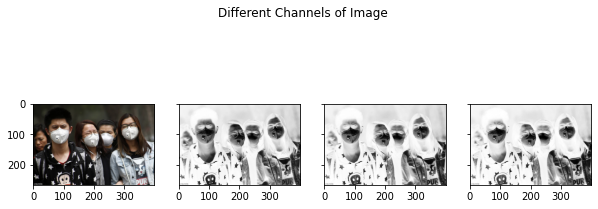

In [ ]:
# plotting the original image and the RGB channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
f.set_figwidth(10)
ax1.imshow(image)

# RGB channels
# CHANNELID : 0 for Red, 1 for Green, 2 for Blue. 
ax2.imshow(image[:, : , 0]) #Red
ax3.imshow(image[:, : , 1]) #Green
ax4.imshow(image[:, : , 2]) #Blue
f.suptitle('Different Channels of Image')

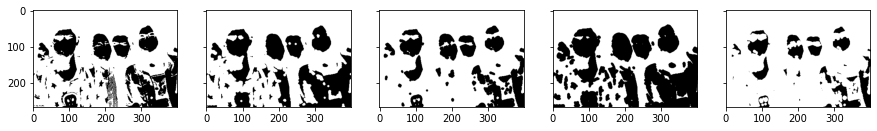

In [ ]:
from skimage.morphology import binary_closing, binary_dilation, binary_erosion, binary_opening
from skimage.morphology import selem

# use a disk of radius 3
selem = selem.disk(3)

# oprning and closing
open_img = binary_opening(bin_image, selem)
close_img = binary_closing(bin_image, selem)

# erosion and dilation
eroded_img = binary_erosion(bin_image, selem)
dilated_img = binary_dilation(bin_image, selem)

plot_image([bin_image, open_img, close_img, eroded_img, dilated_img], cmap='gray')


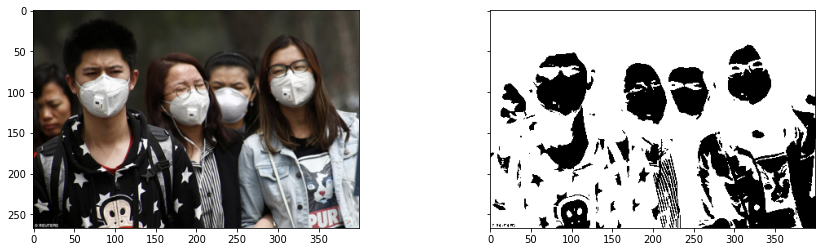

In [ ]:
# bin_image will be a (240, 320) True/False array
#The range of pixel varies between 0 to 255
#The pixel having black is more close to 0 and pixel which is white is more close to 255
# 125 is Arbitrary heuristic measure halfway between 1 and 255 (the range of image pixel) 
bin_image = image[:, :, 0] < 125
plot_image([image, bin_image], cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


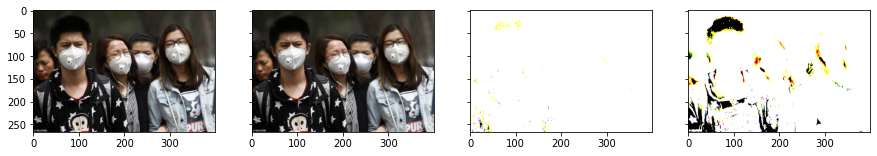

In [ ]:
#way1-this is common technique followed in case of RGB images 
norm1_image = image/255
#way2-in case of medical Images/non natural images 
norm2_image = image - np.min(image)/np.max(image) - np.min(image)
#way3-in case of medical Images/non natural images 
norm3_image = image - np.percentile(image,5)/ np.percentile(image,95) - np.percentile(image,5)

plot_image([image, norm1_image, norm2_image, norm3_image], cmap='gray')